<a href="https://colab.research.google.com/github/joseorlandomx/topicodeindustria1/blob/main/Practica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 1**

José Orlando Salas Contreras (208743738)

[jose.salas4373@alumnos.udg.mx](mailto:jose.salas4373@alumnos.udg.mx)

**Requisitos mínimos:**
* Actividad 1: Brownian Motion 1D - N Trayectorias (3pts)
* Actividad 2: Brownian Motion 2D - 1 Trayectoria (5pts)
* Actividad 3: Correlated Random Walk - Vectores - 1 Trayectoria (7pts)

**Revisión de la práctica:**
* El notebook con la práctica se entregará en Google Colab (compartir por google drive). Será necesario poder demostrar por medio de revisiones (en colab: File--> Save and pin revision) el historial de versiones de su NoteBook.
* El estudiante deberá ser capaz de explicar su código y de corregir errores introducidos a este.

## **Modules**

In [2]:
# Complete Modules
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

# Partial Modules
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import wrapcauchy
from numpy.matrixlib.defmatrix import concatenate

## **Classes**

In [3]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## **Actividad 1, Brownian Motion 1D**

* Guardar trayectoria en **numpy** array
* Visualizar con **matplotlib**

In [4]:
# Init Parameters
s_pos = 20
n_steps = 1000
n_trajectories = 100

# Warning for small numbers of steps
if n_steps < 30:
  print("Warning! The number of steps is too small. Try a larger number.")

# Init Brownian Walk Vector
bro = list()
for i in range(n_trajectories):
  bro.append(np.ones(n_steps)*s_pos)

# Generate Trajectory
for j in range(n_trajectories):
  brow = bro[j]
  for k in range(1, n_steps):
    # Uniform Distribution
    di = np.random.choice([1,-1])
    # Wiener process
    brow[k] = brow[k-1]+(di/np.sqrt(n_steps))

brow

array([20.        , 19.96837722, 19.93675445, 19.90513167, 19.87350889,
       19.84188612, 19.87350889, 19.84188612, 19.87350889, 19.90513167,
       19.93675445, 19.90513167, 19.87350889, 19.84188612, 19.81026334,
       19.84188612, 19.87350889, 19.90513167, 19.87350889, 19.90513167,
       19.93675445, 19.96837722, 20.        , 20.03162278, 20.06324555,
       20.03162278, 20.06324555, 20.09486833, 20.12649111, 20.09486833,
       20.06324555, 20.03162278, 20.        , 19.96837722, 19.93675445,
       19.90513167, 19.93675445, 19.90513167, 19.87350889, 19.84188612,
       19.87350889, 19.90513167, 19.93675445, 19.90513167, 19.87350889,
       19.84188612, 19.87350889, 19.90513167, 19.87350889, 19.84188612,
       19.81026334, 19.77864056, 19.81026334, 19.77864056, 19.81026334,
       19.77864056, 19.74701779, 19.71539501, 19.68377223, 19.65214946,
       19.62052668, 19.65214946, 19.68377223, 19.65214946, 19.62052668,
       19.65214946, 19.68377223, 19.65214946, 19.68377223, 19.65

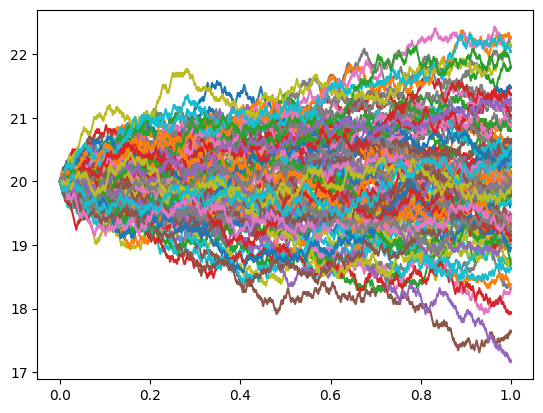

In [5]:
# Times Variable
time = np.linspace(0, 1, n_steps)

# Graphing
for l in range(n_trajectories):
  plt.plot(time, bro[l])

plt.show()

## **Actividad 2, Brownian Motion 2D - 1 Trayectoria**

* Movimientos: Norte, Sur, Este, Oeste
* Guardar trayectoria en **numpy** array
* Visualizar con **matplotlib** - Proyeccion en 2D

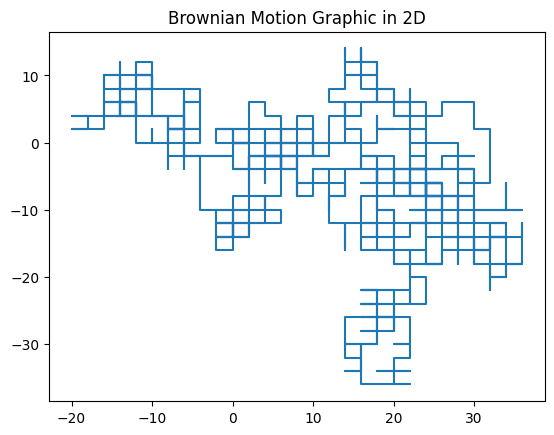

In [6]:
# Init Parameters
n_steps = 1000
s_pos = 0
speed = 8
times = np.linspace(0, 1, n_steps)

# Declare Velocity Vector
velocity =  2

# Brownian Matrix
BM_2d = np.ones(shape = (n_steps, 2))*s_pos

for i in range(1, n_steps):
  index = np.random.choice([0, 1, 2, 3])
  coords = [
      [0, velocity],
      [velocity, 0],
      [0, -velocity],
      [-velocity, 0]]
  xy = coords[index]

  BM_2d[i, 0] = BM_2d[i-1, 0]+xy[0]
  BM_2d[i, 1] = BM_2d[i-1, 1]+xy[1]

# Graphing in 2D with matplotlib
plt.figure('2D Graphic')
plt.title('Brownian Motion Graphic in 2D')
plt.plot(BM_2d[:, 0], BM_2d[:, 1])
plt.show()

* Visualizar con **matplotlib** - Proyeccion en 3D

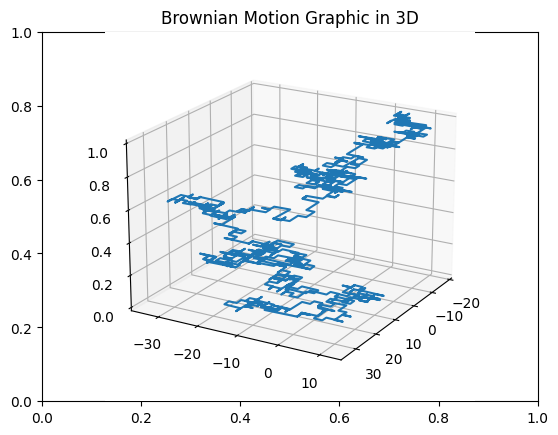

In [7]:
# Graphing in 3D with matplotlib
figure = plt.figure('3D Graphic')
plt.title('Brownian Motion Graphic in 3D')
graph = figure.add_subplot(111, projection='3d')

# Plotting the 3D projection
graph.plot(BM_2d[:, 0], BM_2d[:, 1], times)

# Adjusting the limits
graph.set_xlim([min(BM_2d[:, 0]), max(BM_2d[:, 0])])
graph.set_ylim([min(BM_2d[:, 1]), max(BM_2d[:, 1])])
graph.set_zlim([min(times), max(times)])

# Set Parameters to 3D View
graph.view_init(elev=20, azim=30)

plt.show()

## **Actividad 3, Correlated Random Walk - 1 Trayectoria**

* Utilizar la clase **Vec2d**
* Guardar trayectoria en **numpy** array
* Visualizar con **plotly**

In [8]:
# Init variables
QRW_exponent = 0.7
n_steps = 1000
s_pos = 0
speed = 6

# Generate vector of random values
aux_domain = np.linspace(0, 2*np.pi, n_steps)
wrapcauchy_rvs = wrapcauchy.rvs(QRW_exponent, size = n_steps)

# Init velocity vector
velocity = Vec2d(speed, 0)

# Matriz Brownian Walker
BM_2d = np.ones(shape = (n_steps, 2))*s_pos

for i in range(1, n_steps):
  velocity = velocity.rotated(wrapcauchy_rvs[i])

  BM_2d[i, 0] = BM_2d[i-1, 0]+velocity.x
  BM_2d[i, 1] = BM_2d[i-1, 1]+velocity.y

# Init figure
fig_wrapcauchy_rvs = go.Figure()

aux_plot = np.linspace(-np.pi,np.pi, n_steps)

plot_wrapcauchy_rvs = concatenate((wrapcauchy_rvs[int(n_steps/2):n_steps],wrapcauchy_rvs[0:int(n_steps/2)]), axis = 0)

fig_wrapcauchy_rvs.add_trace(go.Scatter(x = aux_domain,
                                        y = plot_wrapcauchy_rvs,
                                        marker = dict(size=2),
                                        line = dict(width=2),
                                        mode = 'lines',
                                        name = 'cauchy_0.7',
                                        showlegend = True
                                        ))

fig_wrapcauchy_rvs.show()


# time aux vector
times = np.linspace(0,1, n_steps)

# init figure
fig_BM_3d = go.Figure()

# Plot
fig_BM_3d.add_trace(go.Scatter3d(x = BM_2d[:,0],
                                 y = BM_2d[:,1],
                                 z = times,
                                 marker = dict(size=2),
                                 line = dict(width=2),
                                 mode = 'lines',
                                 name = 'cauchy_0.7',
                                 showlegend = True
                                 ))

print(BM_2d[:,0])
# Figure parameters -- update layoud
fig_BM_3d.layout.update(title_text = 'BM trajectory in 2D',
                        autosize = False,
                        width = 500,
                        height = 500,
                        scene_camera=dict(
                            up=dict(x=0, y=1, z=0),
                            center=dict(x=0, y=0, z=0),
                            eye=dict(x=0, y=0, z=1),
                        ),
                        scene = dict(
                            xaxis=dict(title='x_pos (mm)'),
                            yaxis=dict(title='y_pos (mm)'),
                            zaxis=dict(title='z_pos (mm)')
                        ))

fig_BM_3d.show()



[ 0.00000000e+00  2.92820469e+00  5.79999050e+00  1.05366729e+01
  1.46416479e+01  1.87795797e+01  2.29850979e+01  2.50743921e+01
  1.97595144e+01  1.38023816e+01  7.88839927e+00  8.92711078e+00
  7.41989934e+00  9.35259061e+00  1.09483218e+01  1.00109761e+01
  1.11747071e+01  1.06239085e+01  1.26321038e+01  1.31854121e+01
  1.26595113e+01  1.09666045e+01  1.54970257e+01  2.11219532e+01
  2.70000932e+01  3.27829166e+01  3.78186643e+01  4.37428181e+01
  4.95806625e+01  5.55801303e+01  6.11584170e+01  6.71316331e+01
  7.31245041e+01  7.84142242e+01  8.44079483e+01  8.98813304e+01
  9.55006975e+01  9.66599903e+01  9.17186525e+01  8.59460231e+01
  8.19135908e+01  7.61713182e+01  7.14074189e+01  7.59707183e+01
  8.00867917e+01  8.60803883e+01  9.18865953e+01  9.76142568e+01
  1.03468699e+02  1.06801598e+02  1.11022294e+02  1.15856684e+02
  1.17278757e+02  1.19378928e+02  1.20546561e+02  1.21435226e+02
  1.25482111e+02  1.20760679e+02  1.16836726e+02  1.14003712e+02
  1.13883063e+02  1.14216